### **Made By:** Agustinus Angelo Christian Fernando

## **Langkah Workflow Machine Learning:**
1. Menampilkan informasi tentang data (shape, dtypes, dll)
2. Cek apakah ada baris yang duplicated
3. Drop kolom non numerik yang 100% unique
3. Cek berapa baris yang null
    - Jika lebih dari 70% yang null, maka drop saja kolomnya
    - Jika kurang dari 15% yang null, maka drop saja barisnya atau bisa juga diolah menggunakan handling null value
    - Jika di antara itu, bisa lakukan pengolahan null value (imputation, forward/backward fill, mean, median, modus, etc)
4. Lakukan encoding (one hot encoder / label encoder). Pastikan sudah tidak ada yang tipe datanya object (cek menggunakan dtypes)
5. Split data menjadi X dan y
6. Split data menjadi data train dan data test
7. Coba beberapa model (sesuaikan dengan jenis datanya, diskret atau kontiniu)
    - Lakukan fitting, kemudian predict
8. Evaluasi akurasi model (cek apakah overfitting atau underfitting)
9. Jika hasil akurasinya kurang memuaskan, lakukan feature engineering/remove outlier/normalisasi
10. Lakukan feature engineering
    - Cek apakah ada feature yang tidak diperlukan
    - Cek apakah ada feature yang bisa disederhanakan
11. Remove outlier jika ada yang parah
12. Lakukan normalisasi dengan standardscaler / minmax scaler
13. Jika feature engineering tidak mampu menaikkan akurasi model, coba gunakan model lain dan atur parameternya (menggunakan gridsearchcv, dll)
14. Lakukan EDA dan visualisasi data

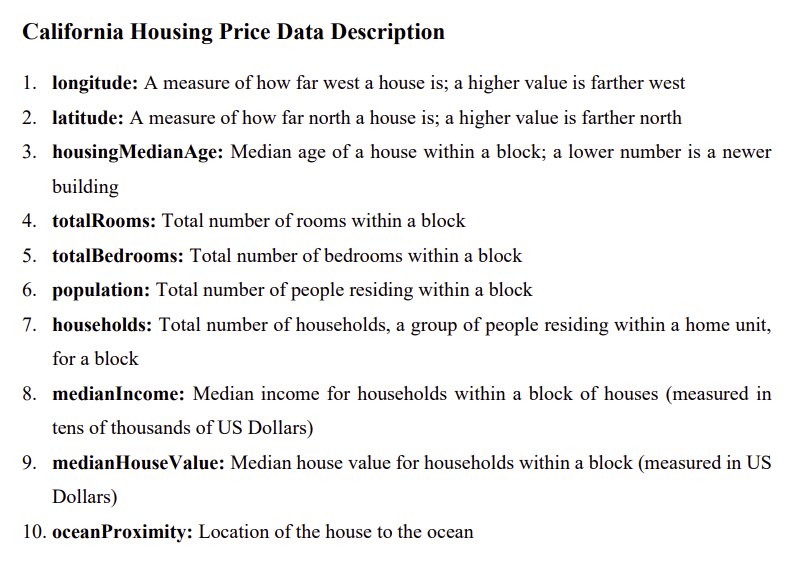

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Ukuran data

In [ ]:
df.shape

(20640, 10)

Tipe data

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Nanti kita harus ngubah tipe data object menjadi tipe data numerik agar bisa diprediksi

Nama-nama kolomnya

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Cek apakah ada baris yang dobel atau tidak

In [ ]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Tampak gak ada data yang duplikat.

Misal ada, begini cara hilanginnya:

In [ ]:
# df = df.drop_duplicates()

Mengecek berapa banyak yang null

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dalam persentase

In [ ]:
df.isnull().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
# Menampilkan jumlah unique value di suatu kolom
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

longitude : 844 labels
latitude : 862 labels
housing_median_age : 52 labels
total_rooms : 5926 labels
total_bedrooms : 1924 labels
population : 3888 labels
households : 1815 labels
median_income : 12928 labels
median_house_value : 3842 labels
ocean_proximity : 5 labels


Hasil analisis:
- Tidak ada kolom yang perlu dibuang karena semua kolom berguna untuk prediksi dan tidak ada yang null nya parah

In [ ]:
# df.drop(['total_rooms', 'total_bedrooms'], axis=1, inplace=True)

## **Cara-cara mengatasi null values**
 1. Drop Null Values (drop baris atau drop kolom)
 2. Forward Fill & Backward Fill
 3. Mean, Median, Modus (kalau tipe datanya string, biasanya gunakan modus)
 4. Imputation (KNN Imputation)

## **Kapan pakai cara-cara tersebut?**


- Jika lebih dari 60% yang null, maka drop saja kolomnya
- Jika kurang dari 60%, maka bisa lakukan pengolahan null value (mean, median, modus, forward/backward fill, imputation, dll) **atau** bisa drop saja baris yang menyebabkan null value.

## **Penting!**
Konsepnya trial and error. Bisa jadi akurasinya lebih bagus kalau didrop barisnya. Tapi, bisa jadi juga lebih bagus kalau dilakukan pengolahan null values. Tidak ada yang pasti.

Jadi, gunakan yang hasil akurasinya paling bagus

In [ ]:
df.isnull().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
df1 = df.copy()

### **Cara 1: Drop Null Values**
- Drop kolom (ketika terlalu banyak yang null di kolom tersebut)

In [ ]:
# df1.drop(['total_bedrooms'], axis=1, inplace=True)

- Drop baris (ketika hanya sedikit yang null di kolom tersebut)

In [ ]:
df1.shape

(20640, 10)

In [ ]:
# Untuk menghapus baris yang ada nilai null di kolom total_bedrooms nya
df1 = df1.dropna(subset=['total_bedrooms'])

In [ ]:
df1.shape

(20433, 10)

In [ ]:
df1.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

### **Cara 2: Forward fill & Backward Fill**
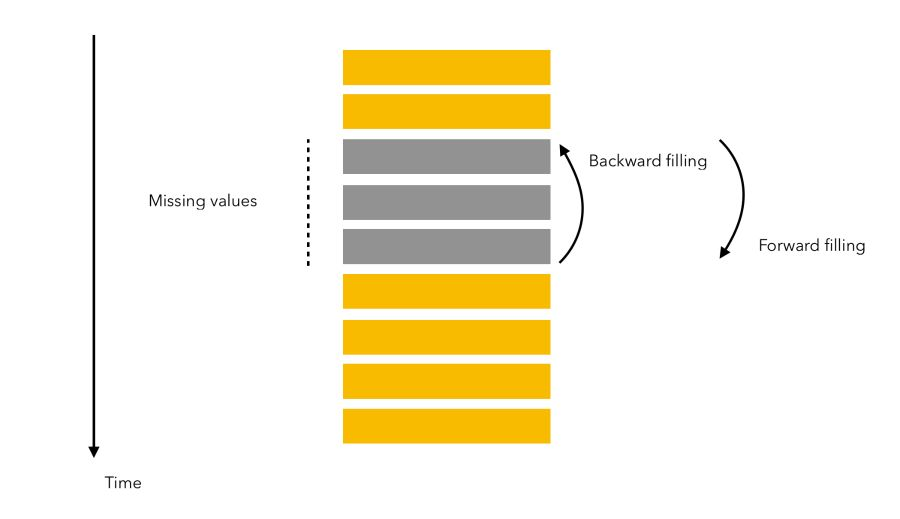
- Forward Fill

In [ ]:
df2 = df.copy()

In [ ]:
df2.isnull().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
df2['total_bedrooms'] = df2['total_bedrooms'].fillna(method='ffill')

In [ ]:
df2.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

- Backward Fill

In [ ]:
df3 = df.copy()

In [ ]:
df3['total_bedrooms'] = df3['total_bedrooms'].fillna(method='bfill')

In [ ]:
df3.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

### **Cara 3: Mean, Median, Modus**
FYI: Mean dan Median untuk data numerik, Modus untuk data string

- Mean

In [ ]:
df4 = df.copy()

Cara ngecek mean kolom age

In [ ]:
df4['total_bedrooms'].mean()

537.8705525375618

Rata-rata jumlah kamar tidur di daerah tersebut = 537 kamar

In [ ]:
df4['total_bedrooms'] = df4['total_bedrooms'].fillna(537.8705525375618)

Cara di atas sama saja dengan cara berikut ini

In [ ]:
df4['total_bedrooms'] = df4['total_bedrooms'].fillna(df4['total_bedrooms'].mean())

In [ ]:
df4.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

- Median

In [ ]:
df5 = df.copy()

In [ ]:
df5['total_bedrooms'].median()

435.0

Median jumlah kamar tidur di area tersebut = 435 kamar

In [ ]:
df5['total_bedrooms'] = df5['total_bedrooms'].fillna(435)

Cara di atas sama saja dengan cara berikut ini

In [ ]:
df5['total_bedrooms'] = df5['total_bedrooms'].fillna(df5['total_bedrooms'].median())

FYI: Biasanya median lebih dipakai daripada mean karena mean tidak akurat kalau ada outlier

- Modus (biasa dipakai untuk data string)

In [ ]:
df6 = df.copy()

In [ ]:
df6['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [ ]:
df6['total_bedrooms'].mode()[0]

280.0

In [ ]:
df6['total_bedrooms'] = df6['total_bedrooms'].fillna(280)

In [ ]:
df6['total_bedrooms'] = df6['total_bedrooms'].fillna(df6['total_bedrooms'].mode()[0])

In [ ]:
df6.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

### **Cara 4: Imputation**
- KNN Imputation

In [ ]:
df7 = df.copy()

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=3) #artinya dia mengolah nilai 3 tetangga terdekat untuk mengisi nilai null valuesnya
df7[['total_bedrooms']] = imputer.fit_transform(df7[['total_bedrooms']])

In [ ]:
df7.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

## **Jadi, pilihlah teknik yang paling cocok dengan data kalian dan mampu meningkatkan akurasi prediksi**

## **Implementasi di data utama**

In [ ]:
df.isnull().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
df = df.dropna(subset=['total_bedrooms'])

In [ ]:
df.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### **Data Cleaning Done 🤩**

## **Encoding**

### **Apa itu encoding?**
Encoding adalah proses mengubah data kategorikal menjadi data numerik.

### **Apa tujuannya?**
Tujuannya agar bisa dilakukan modeling untuk prediksi Machine Learning.

### **Jenis Encoding yang biasa digunakan:**
1. **One hot encoder**
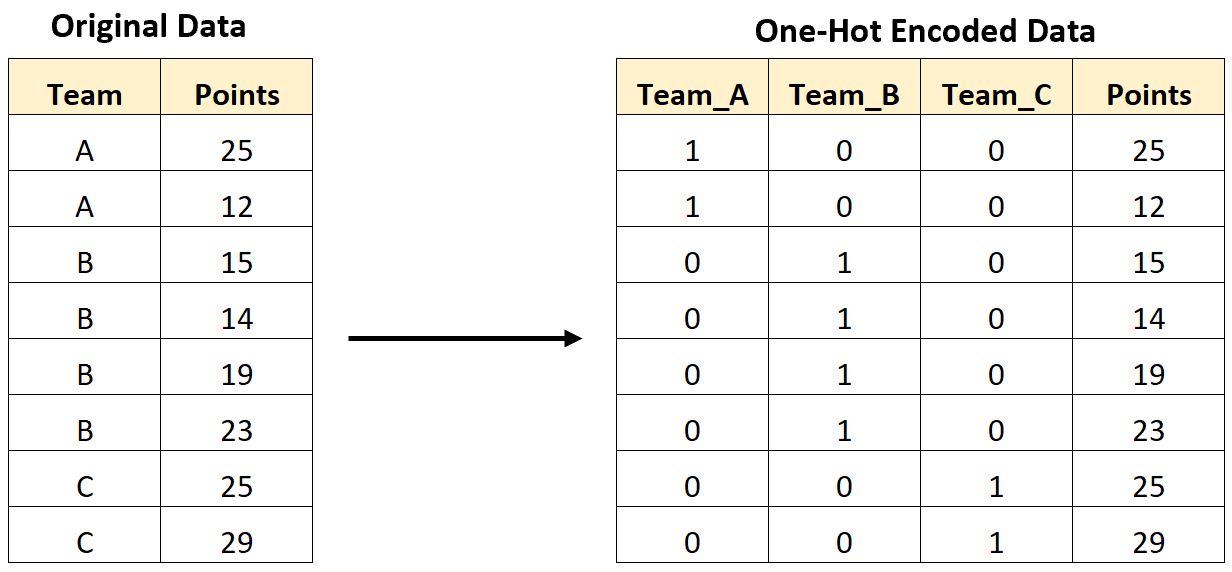

2. **Label encoder**
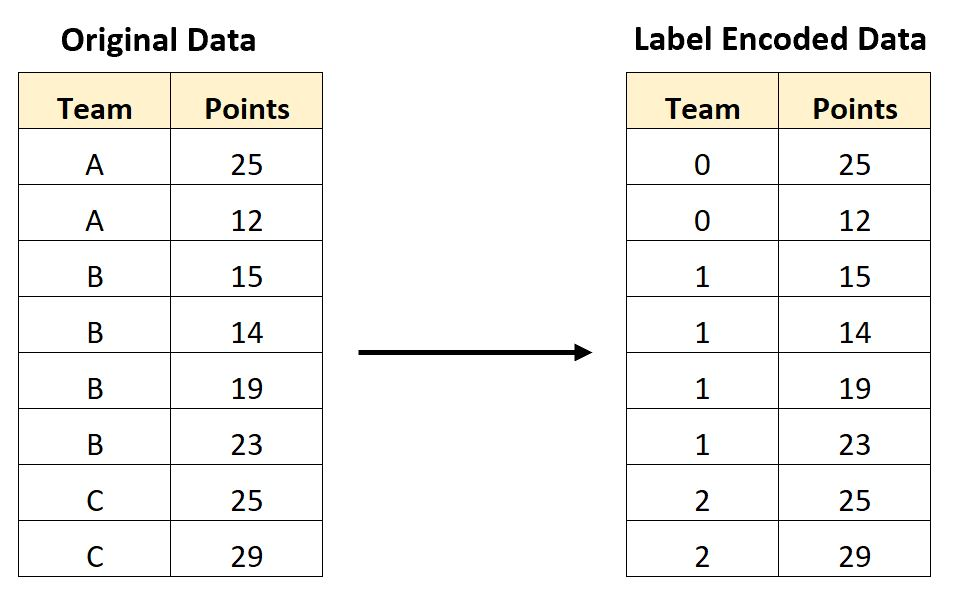

### **Kelebihan One Hot Encoder:**
  - Tidak terjadi bias karena urutan (tidak terpengaruh oleh urutan)

### **Kelemahan One Hot Encoder:**
  - Rawan peningkatan dimensi yang berlebihan sehingga bisa jadi menurunkan akurasi prediksi. Ingat bahwa semakin besar dimensi, maka data yang dibutuhkan juga semakin banyak.

### **Kelebihan Label Encoder:**
  - Tidak menambah dimensi
  - Sederhana untuk diimplementasikan

### **Kekurangan Label Encoder:**
  - Bisa bias terhadap urutan. Karena dia kan berupa urutan angka. Nah, takutnya program mengira itu adalah urutan yang sebenarnya, padahal kan urutan angka itu belum tentu memiliki makna khusus.

## **One Hot Encoder**

In [ ]:
df8 = df.copy()

In [ ]:
df8 = pd.get_dummies(data = df8)

df8.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
kolom_kategorikal = ['ocean_proximity']

LE = LabelEncoder()

for kolom in kolom_kategorikal:
  df[kolom] = LE.fit_transform(df[kolom])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

## **Tipe-tipe Machine Learning:**
  - **Supervised Learning:**
    Memprediksi data yang sudah ada labelnya. Contohnya kita tahu bahwa kita akan memprediksi harga rumah di suatu area. Karena kita tahu actual value dari sesuatu yang akan kita prediksi, maka ini adalah kasus Supervised Learning Kontiniu
    Contoh: Klasifikasi dan Kontiniu

  - **Unsupervised Learning:**
    Memprediksi data yang belum ada labelnya. Contohnya adalah kita membuat cluster customer berdasarkan kepribadian customer tersebut. Dari awal kita memang belum tau cluster dari customer tersebut. Contoh: Customer Clustering

  - **Reinforcement Learning:**
    Agen belajar dari pengalaman. Jika benar akan dapat reward. Jika salah, dapet punishment. Contoh: robot


Kasus kita kali ini adalah supervised learning untuk memprediksi label kontiniu

## **Modeling Machine Learning** (templatenya bakal sering digunakan)
1. Split data menjadi X dan y
    
    X = Variabel independen
    
    y = Variabel dependen (yang akan diprediksi)


In [ ]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

2. Split data menjadi X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

## **Modeling**
### **Model yang biasa digunakan untuk data klasifikasi:**
  - Logistic Regression
  - Catboost Classifier
  - XGBoost Classifier
  - Gradient Boosting Classifier
  - Naive Bayes
  - Perceptron
  - Support Vector Machine
  - Decision Tree
  - Random Forest
  
### **Model yang biasa digunakan untuk data kontiniu:**
  - Linear Regression
  - Catboost Regressor
  - Random Forest Regressor
  - XGBoost Regressor
  - Gradient Boosting Regressor
  - Ridge
  - Lasso

Secara umum cara kerja model itu ada beberapa macam:

- Model yang basisnya matematis (vektor, probabilitas, dan metode matematis lain): Support Vector Machine, Gaussian Naive Bayes, Multinomial Naive Bayes, Logistic Regression, Linear Regression, Ridge, Lasso dll
- Model deep learning : Multilayer Perceptron, LSTM, Transformer, dll
- Model basis pohon keputusan : Decision Tree itu sendiri bisa untuk regressor atau classifier.

Nah model decision tree ini kemudian banyak dikembangkan "ensemble" nya. Contoh ensemblenya itu Random Forest, Gradient Boosting, Extra Trees, Ada Boost dan banyak lainnya.

Pengembangan terbarunya itu pada pakai teknik Gradient Boosting ini tapi diimprove kayak LGBM atau XGB.

## **Linear Regression**

Linear regression intinya sama seperti yang diajarkan di Statistika atau PVA. Nantinya bakal membuat suatu garis berdasarkan X yang ada. Paling gampang bentuk persamaannya kan y = ax + b. Intinya linreg ini itu meminimalkan jumlah kuadrat residual antara data asli dan target yang diprediksi.

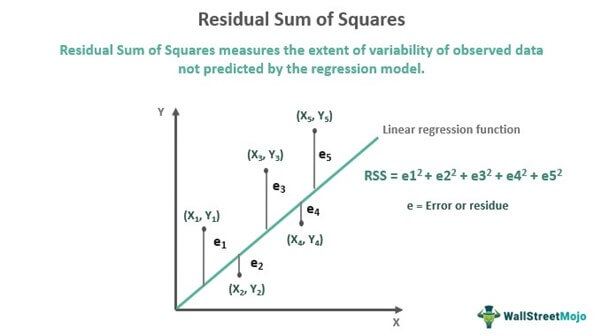

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

# Melatih modelnya
linreg.fit(X_train, y_train)

# Menggunakan model yang sudah dilatih tadi untuk prediksi
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

Evaluate the model using R2 score and MAE (Mean Absolute Error)

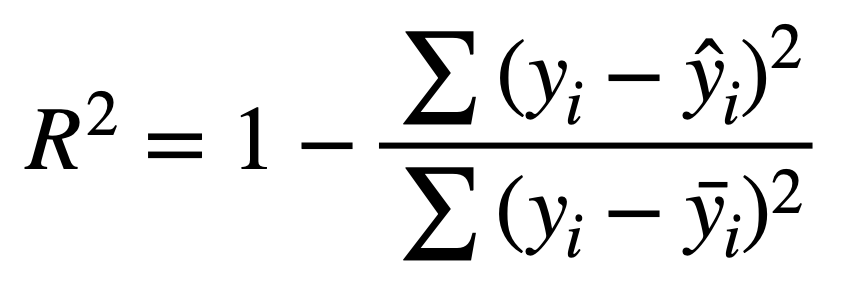

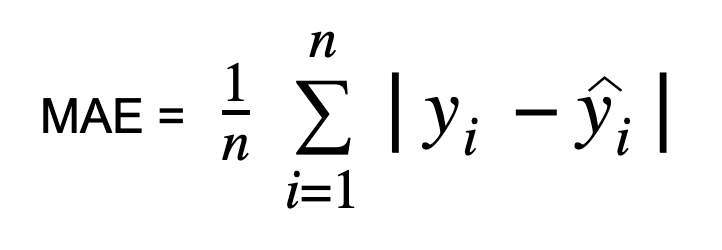

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R2 Train:', r2_train)
print('R2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

R2 Train: 0.6367139456174751
R2 Test: 0.637248627208227
MAE Train: 50835.73126563392
MAE Test: 50799.709997832564


**Analisis:**
- Tidak overfitting karena akurasi data test mirip dengan akurasi data train
- Agak underfitting karena akurasinya kurang bagus, masih sekitar 63%

## **Random Forest Regressor**

Random Forest Regressor ini seperti yang sudah dijelaskan sebelumnya itu dia pakai banyak decision tree regressor. Penggunaan banyak decision tree regressor ini juga ada tekniknya. Ada yang menggunakan teknik bootstrapping itu dia pakai random sample dari data yang ada untuk nge latih masing-masing decision tree jadi tiap decision tree bisa dibilang dilatih dengan data yang berbeda. Selain bootstrapping juga bisa dilakukan feature randomness jadi cuma diambil beberapa fitur doang jadi fitur yang dipakai sama tiap decision tree yang dibikin juga bakal beda. Nah trus sisanya tinggal dilakuin averaging dari tiap output yang dihasilkan sama decision tree itu dan jadilah output random forest regressor.

Metode yang "nyepam" decision tree ini membuat si random forest regressor ini rawan banget sama "overfitting". Nah makanya harus hati-hati kalau mau pakai random forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

# Melatih modelnya
rf.fit(X_train, y_train)

# Menggunakan model yang sudah dilatih tadi untuk prediksi
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R2 Train:', r2_train)
print('R2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

R2 Train: 0.9744423118861761
R2 Test: 0.8210988646616656
MAE Train: 11875.98431298177
MAE Test: 31818.69996819183


**Analisis:**
- Tampak overfitting
- Kita akan coba menggunakan model yang lain

## **Catboost Regressor**

Catboost ini masih juga merupakan pengembangan dari gradient boosting. Masih sekeluarga sama XGB sama LGBM cuma pakai algoritma gradient boosting yang berbeda. Catboost ini direkomendasikan untuk handle data kategorikal. LGBM, XGB juga sebenernya bisa langsung di train di data kategorikal tanpa perlu manual encoding dulu karena kita tau kalau pohon keputusan sebenernya juga bisa untuk data kategorikal. Tapi catboost ini sesuai namanya dia punya breakthrough khusus untuk handle data kategorikal.

Intinya cara kerjanya juga seperti gradient boosting pada umumnya. Dia membangun suatu set decision tree. Nah pada tahap selanjutnya successive decision tree ini diharapkan punya prediksi yang lebih baik daripada sebelumnya lewat optimisasi loss function.

In [ ]:
# install dulu package catboost karena google colab tidak built-in catboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cb = CatBoostRegressor()

# Melatih modelnya
cb.fit(X_train, y_train)

# Menggunakan model yang sudah dilatih tadi untuk prediksi
y_pred_train = cb.predict(X_train)
y_pred_test = cb.predict(X_test)

Learning rate set to 0.063665
0:	learn: 111840.7053077	total: 52.7ms	remaining: 52.6s
1:	learn: 108029.4762475	total: 57.7ms	remaining: 28.8s
2:	learn: 104477.6585416	total: 63.5ms	remaining: 21.1s
3:	learn: 101407.5653012	total: 76.9ms	remaining: 19.2s
4:	learn: 98456.8893113	total: 88.9ms	remaining: 17.7s
5:	learn: 95735.4975232	total: 95.8ms	remaining: 15.9s
6:	learn: 93408.2843506	total: 100ms	remaining: 14.2s
7:	learn: 91248.7320143	total: 105ms	remaining: 13s
8:	learn: 89155.6751610	total: 109ms	remaining: 12s
9:	learn: 87423.0865930	total: 113ms	remaining: 11.2s
10:	learn: 85637.2587431	total: 118ms	remaining: 10.6s
11:	learn: 84176.8638242	total: 122ms	remaining: 10.1s
12:	learn: 82686.1401656	total: 127ms	remaining: 9.61s
13:	learn: 81160.8731254	total: 131ms	remaining: 9.23s
14:	learn: 80061.6307944	total: 136ms	remaining: 8.91s
15:	learn: 78577.0309840	total: 140ms	remaining: 8.63s
16:	learn: 77651.8290467	total: 145ms	remaining: 8.38s
17:	learn: 76572.1912121	total: 149ms	r

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R2 Train:', r2_train)
print('R2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

R2 Train: 0.9038024091843758
R2 Test: 0.8434637235978499
MAE Train: 25053.750817395798
MAE Test: 30078.953417014596


Mari kita coba tingkatkan akurasinya dengan melakukan **tuning hyperparameter**

### **Tuning Hyperparameter**
Bertujuan untuk mengatur parameter dari model agar bisa memberikan hasil yang maksimal.

GridSearchCV bertugas untuk mencari parameter terbaik secara otomatis. Jadi, kita tidak perlu tuning manual.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
catboost_model = CatBoostRegressor()

# Pilihan parameter
param_grid = {
    'iterations': [500, 1000, 1500],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [6, 8, 10],  # Depth of trees
    'l2_leaf_reg': [1, 3, 5]  # L2 regularization parameter
}

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

In [ ]:
catboost_model = CatBoostRegressor(**best_params)

catboost_model.fit(X_train, y_train)

y_pred_train = catboost_model.predict(X_train)
y_pred_test = catboost_model.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R2 Train:', r2_train)
print('R2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

R2 Train: 0.963060278674848
R2 Test: 0.8525362720718943
MAE Train: 15908.051748740514
MAE Test: 28872.026322998452


**Analisis:**
- Tampak bahwa akurasinya lebih tinggi daripada sebelum dilakukan hyperparameter tuning, bahkan lebih tinggi daripada kedua model sebelumnya tadi

In [ ]:
y_test

5094      98500.0
507      126900.0
7084     184700.0
9517      96200.0
487      289500.0
           ...   
5819     255900.0
17332    292900.0
1924     120100.0
10341    242000.0
17841    245800.0
Name: median_house_value, Length: 4128, dtype: float64

In [ ]:
y_pred_test

array([114457.55566108, 197347.73880854, 192316.33917487, ...,
       129710.92817875, 213302.1504046 , 189693.76821878])

## **Visualize the Evaluation**

In [ ]:
import matplotlib.pyplot as plt

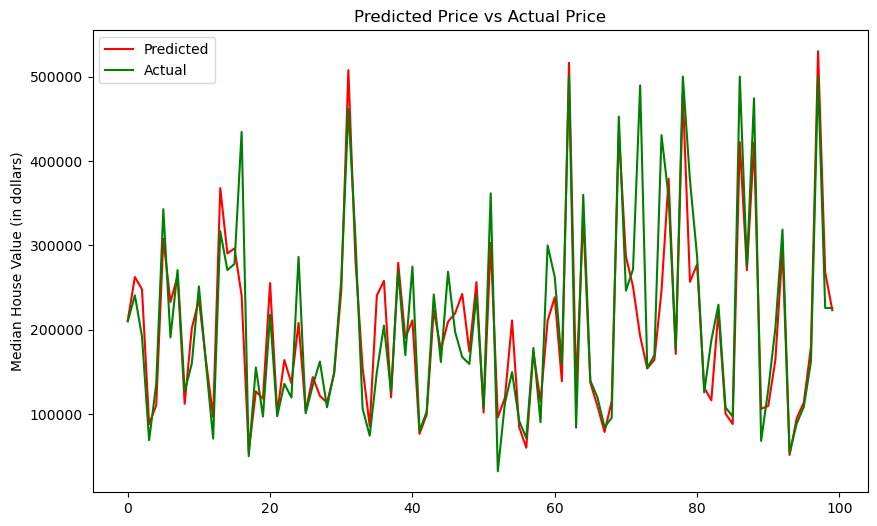

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(y_pred_test[:100], label='Predicted', color='red')
plt.plot(y_test[:100].values, label='Actual', color='green')

plt.title('Predicted Price vs Actual Price')
plt.ylabel('Median House Value (in dollars)')
plt.legend()

plt.show()

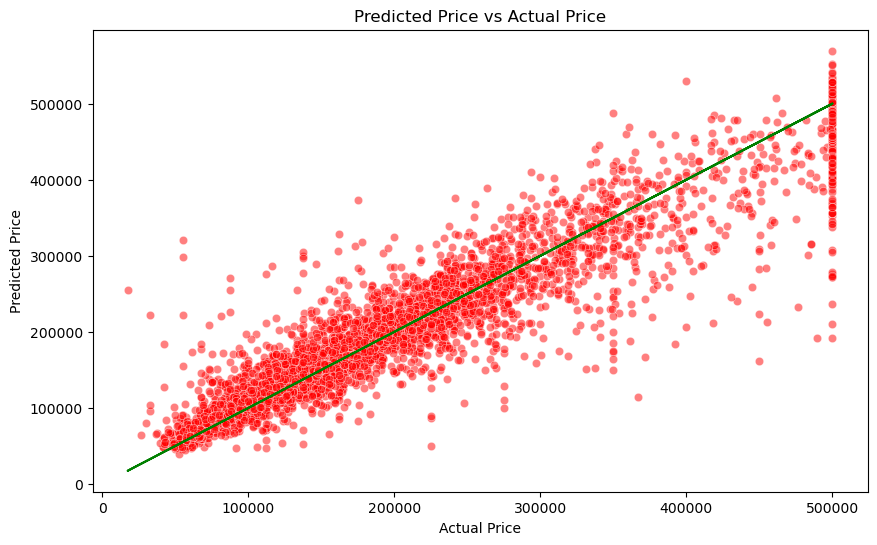

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test, y=y_pred_test, color='red', alpha=0.5)
plt.plot(y_test, y_test, color='green')
plt.title('Predicted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

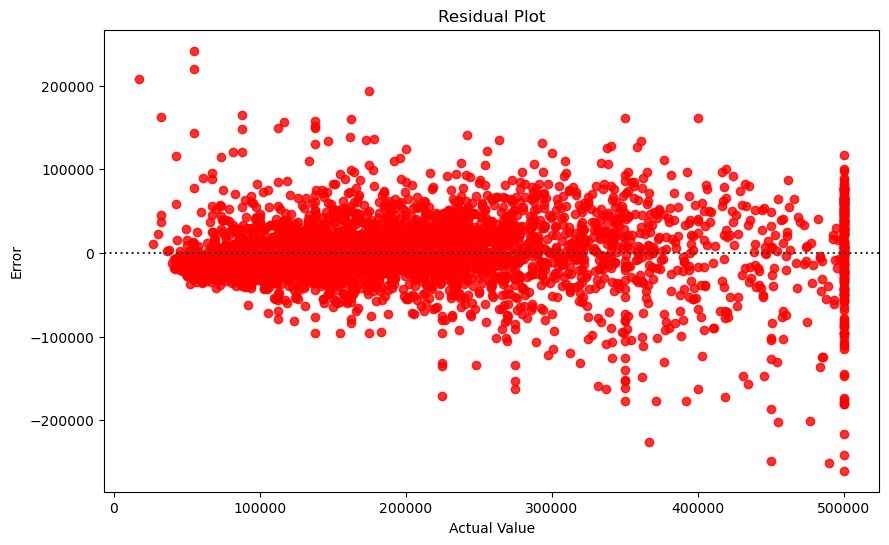

In [ ]:
plt.figure(figsize= (10, 6))

sns.residplot(x=y_test, y=y_pred_test, color='red')

plt.title('Residual Plot')
plt.xlabel('Actual Value')
plt.ylabel('Error')

plt.show()

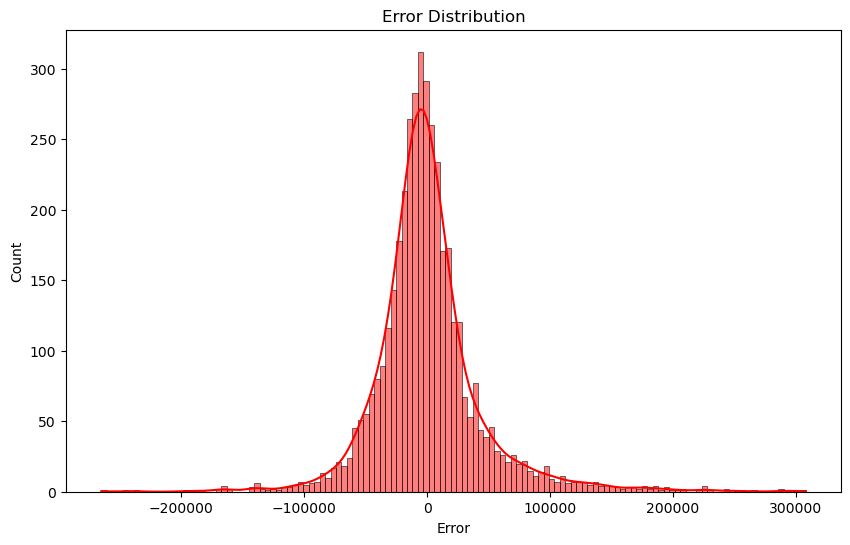

In [ ]:
selisih = y_test - y_pred_test

plt.figure(figsize= (10, 6))

sns.histplot(selisih, color='red', kde=True)

plt.title('Error Distribution')
plt.xlabel('Error')

plt.show()

## **Feature Importance**

In [ ]:
import seaborn as sns

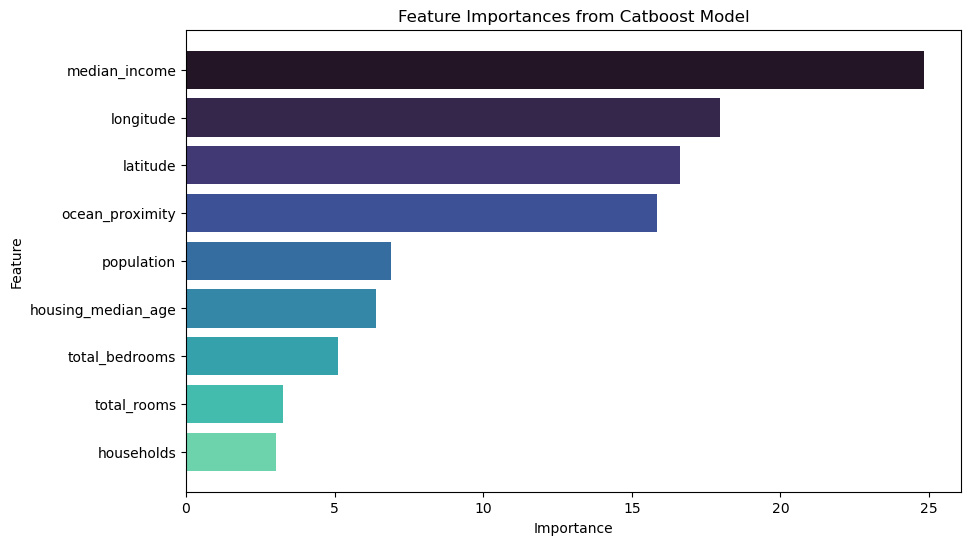

In [ ]:
feature_importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': catboost_model.feature_importances_}).sort_values(by='importance', ascending=False)

feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("mako", 10)
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'], color=palette)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Catboost Model')
plt.gca().invert_yaxis()
plt.show()

## **Use the model**

In [1]:
import pickle

In [ ]:
with open('catboostmodel.pickle', 'wb') as f:
    pickle.dump(catboost_model, f)

In [2]:
with open('catboostmodel.pickle', 'rb') as f:
    model = pickle.load(f)

In [5]:
inputan = [[-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252, 3]]
y_pred_inputan = model.predict(inputan)
y_pred_inputan

array([433991.77479492])

In [8]:
print(f"Harga rumah hasil prediksi: {y_pred_inputan[0].round()}")

Harga rumah hasil prediksi: 433992.0
